In [1]:
%load_ext autoreload
%autoreload 2

import pyleoclim.api as pyleo
import pandas as pd
import numpy as np
from pyleoclim import examples

## Series

In [2]:
soi_data = examples.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values

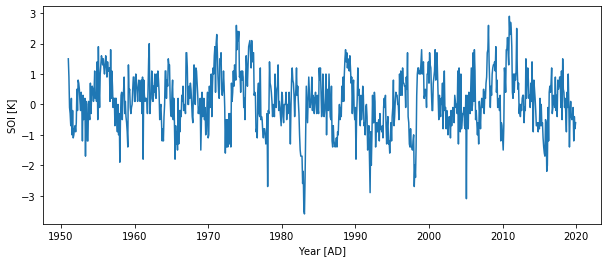

In [3]:
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K')
# print(ts)
fig, ax = ts.plot()

## Spectral analysis on the Series

In [4]:
%%time
psd = ts.spectral(args={'nMC': 0})
# print(psd)

CPU times: user 1min 9s, sys: 274 ms, total: 1min 9s
Wall time: 13.3 s


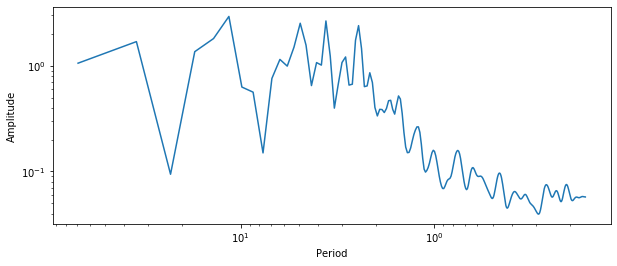

In [7]:
fig, ax = psd.plot()

## Wavelet analysis on the Series

In [6]:
%%time
scal = ts.wavelet(args={'nMC': 0})

CPU times: user 1min 16s, sys: 171 ms, total: 1min 16s
Wall time: 13.2 s


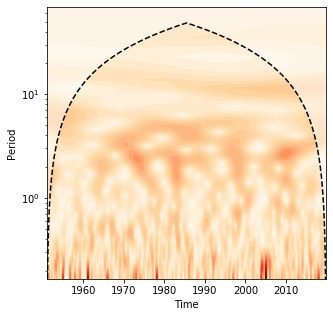

In [10]:
fig, ax = scal.plot()

## Wavelet coherence analysis on two Series objs

In [12]:
import scipy.io as sio
import matplotlib.pyplot as plt

data = sio.loadmat('../example_data/wtc_test_data_nino.mat')
air = data['air'][:, 0]
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]

(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1fc2868090>)

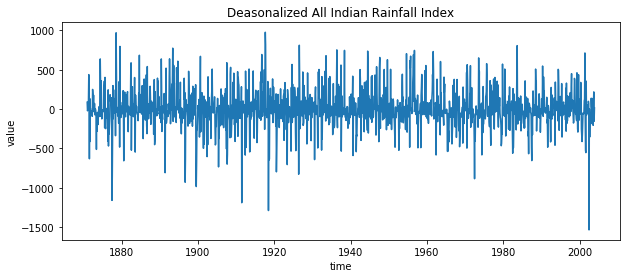

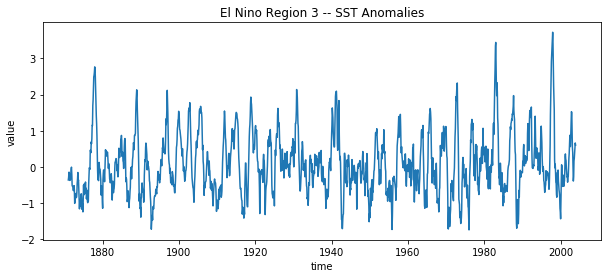

In [13]:
ts_air = pyleo.Series(time=t, value=air)
ts_nino = pyleo.Series(time=t, value=nino)

ts_air.plot(title='Deasonalized All Indian Rainfall Index')
ts_nino.plot(title='El Nino Region 3 -- SST Anomalies')

In [15]:
coh = ts_air.wavelet_coherence(ts_nino, args={'nMC': 0})

Setting tau=[1871.         1871.84126582 1872.68253165]...[2002.23746835 2003.07873418 2003.92      ], ntau=159
Setting freqs=[0.01220703 0.0129329  0.01370193]...[5.56811699 5.89921445 6.25      ], nfreqs=109


/home/fzhu/Apps/miniconda3/envs/py3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../pyleoclim/spectral.py", line 1152:
        @nb.jit(nopython=True, parallel=True, fastmath=True)
        def loop_over(nf, nt, Neffs, a0, a1, a2):
        ^

  state.func_ir.loc))
/home/fzhu/Apps/miniconda3/envs/py3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../pyleoclim/spectral.py", line 1152:
        @nb.jit(nopython=T

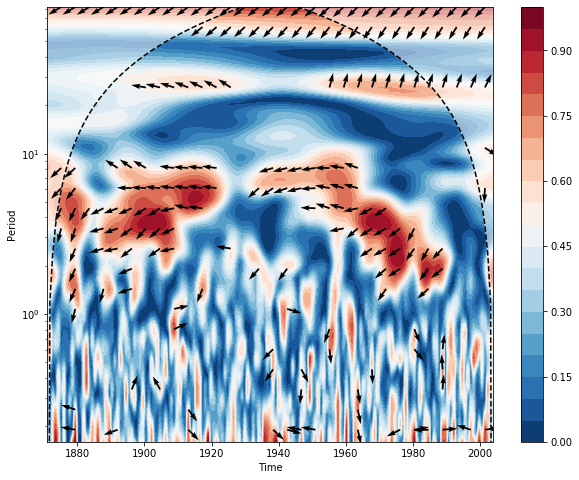

In [34]:
fig, ax = coh.plot()